## Logistic (and Linear) Regression Regularization

In the last post I went through some of the reasoning behind Logistic Regression and derived most of the equations needed for implementation. In this post I will look at "Regularization" in order to address an important problem that is common with implementations, namely over-fitting. We'll look at this for logistic regression and linear regression. After getting the equations for regularization worked out we'll look at an example in Python showing how this can be used for a badly over-fit linear regression model.

The post that laid the foundation for this post was ["Logistic Regression the Theory"](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Logistic-Regression-Theory-988/).

## Avoiding Over-Fitting

In [part6 of the posts on Linear Regression](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-6-978/) I talked about over-fitting in that context. The same problems happen in Logistic Regression and can be quite bad in cases with small datasets and many features. 

>I think of methods like Regularization as being in the class of "keep my optimization from blowing up". 

The more complicated your model, the more likely you are to have numerical instabilities develop during optimization. The reason is, that it's often the case that making things "blow up" looks like the best path to take for an optimization program. If it can find a path that causes the cost to "fall of a cliff" then it may just do that because it "reduces" the cost function even if the result is garbage for your model.

Some things you can do to help with the over-fitting problem are;
- **Model Interpretation and Feature Elimination**
Reducing the number of feature variables and help with over-fitting and model interpretation.
If you have only a few "good" features then it may be better to use just the features that provide the most correlation or discrimination for what you are trying to achieve with the model. It's common in Logistic Regression to do error analysis for feature elimination. It's usually done by analyzing a model with and without a given feature to see if the feature makes a statistically significant contribution to the accuracy of the model. This can be very useful for deciding if a "question" is reliant in the study you are looking at. For example, a study that is looking at lifestyle "actions" vs the likelihood of developing cancer may find that smoking is a significant "feature" but watching TV for 4 hours a day is not significant. That is a case where you have clear meaning assigned to your features and this is valuable for interpreting the models "meaning". However, if the features are just random pixels in an image then it might be obvious how to interpret any individual pixel. It is also, common to have many features that are statistically poor predictors but taken collectively give a very good model with high predictive value.  


-  **Constrained Optimization**
If there is a physical interpretation of what the parameters in $a$ mean then there may be a logical mathematical constraint that could be applied. That is the realm of algorithms referred to as "Constrained Optimization". That means to add extra terms to the Model and/or Cost Function to constrain the parameters you are optimizing within some bounds. That is a common practice and is often inherent in the nature of the problem you are working on.

- **Regularization - Optimization improvement with "model hyper-parameters"**
It's really most common in machine learning that you just want "any" model that will have predictive value. Interpretation of the model, features, and parameters may be extremely complicated or impossible. Your main concern is to stabilize the optimization so you get a model that gives a good fit to the training data, generalizes well on test-set data and has good predictive value. This is where Regularization comes in. With regularization an adjustable optimization parameter constraint in the form of an additional cost function term can be used to algorithmically control the stability of the optimization.

## Regularized Cost Function
Regularization acts by penalizing large values of the optimization parameters. It gives a more balanced result that is usually much better behaved, provides a good fit to the dataset and provides good predictive value.

The most common way to "regularize" the cost function is to add a "scaled square of the 2-norm". There are other norms that can used for this and there is some theoretical justification for all of the choices. However, in my opinion it's really about doing "anything" to stabilize the optimization! The squared 2-norm is easy to work with and has the advantage that it is a "smooth" function so the gradient will be well behaved.

$$ R(a[1:n]:\lambda) = \lambda \lVert a \rVert^2_2 $$

It is most common to exclude the first element of $a$, the 0 order term, from the parameter vector $a$. The first element of $a$ can be thought of as multiplying a feature variable of the form $x^0=1$. That term is the "intercept" or what is often referred to as the "bias term". That element is excluded from the regularization term $R$.

In more detail $R$ looks like,
$$ \begin{align} R(a[1:n]:\lambda) &= \lambda \lVert a_{1:n} \rVert^2_2 \\ \\
&= \lambda a[1:n]' a[1:n] \\ \\
\text{(where } a[1:n] &= a \text{ with the 0th* element excluded) } \\ \\
&= \lambda a'La \\ \\
\text{(where } L &=
  \begin{bmatrix} 0&0&0&0&0  \\ 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0& \ddots&\vdots \\ 0&0&0& \cdots& 1 \end{bmatrix}  \text{ ,identity matrix with the (1,1)* element = 0)}
\end{align} $$

\*Note: referring to the first term of a vector as the 0th element is annoying to me personally but many C based languages like Python use this convention. In the first post I did on Linear Regression I warned that it was important to be flexible with notation and to understand what things really mean! You could say the 1,1 element of $L$ is the 0,0 element if that's what you like.

### Equations for Logistic Regression with Regularization in Matrix Form
In my [last post on Logistic Regression](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Logistic-Regression-Theory-988/) I derived the equations for logistic regression in matrix form including an alternative derivation for $J$ and the the gradient for $J$. Adding the regularization term, $R$, is a simple modification. With the form of $R$ we are using the modification to the gradient is easy to derive using the differential of $R$.

$$ d[R] = d\left[\frac{\lambda}{2m} a'La \right] = \frac{\lambda}{m} a'Lda$$
$$ \nabla R = \frac{\lambda}{m}La$$
$La$ is formal matrix notation, it is actually trivial. It is just the vector $a$ with the first element set to 0.

**Equations for logistic regression with regularization.**

$$ \bbox[25px,border:2px solid green]{
  \begin{align}
  m & = \text{the number of elements in the training set} \\ \\
  n & = \text{the number of elements in the parameter vector }a \\ \\
  \lambda & = \text{the adjustable regularization weight} \\ \\
  g(z) & = \frac{1}{1 + e^{-z}} \\ \\
  h_a(X) &= g(Xa) \\ \\
 J(a)  &= -\frac{1}{m} \left( y' log(h_a(X) + (1-y)'log(1 - h_a(X) \right) + \frac{\lambda}{2m} a'La \\ \\
 \nabla J(a)  &= \frac{1}{m}X'(h-y) + \frac{\lambda}{m} La  \\ \\
 &=\frac{1}{m}X'(g(Xa) - y) + \frac{\lambda}{m} La
  \end{align} }$$

In my next post on logistic regression I'll do an implementation of these equations and some examples. To finish this post I'd like to show how regularization can be used in Linear Regression.

## Regularization for Linear Regression

In [part5 of the posts on Linear Regression](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-5-974/) I derived the matrix "solution" for multi-variate Linear Regression. [In par6 of the Linear Regression posts](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-6-978/) I had an example of bad over fitting. In this section we'll add regularization to those equations and use that over-fit example to see how regularization works.

**Equations for linear regression with regularization.**

$$ \bbox[25px,border:2px solid green]{
\begin{align}
h_a(X) & = Xa \\ \\
J(a) & = \frac{1}{2m} (Xa - y)'(Xa - y) + \frac{\lambda}{2m} a'La \\ \\
\nabla_aJ(a) & =  \frac{1}{m} (X'Xa - X'y) + \frac{\lambda}{m} La \\ \\
a & = (X'X + \lambda L)^{-1}X'y
\end{align} }$$

The linear regression expressions are similar to logistic regression but in this case the solution for $a$ can easily be found explicitly. To solve for $a$ set the gradient, $\nabla_aJ(a)$ to 0.

$$ \begin{align}
\nabla_aJ(a) & = 0 \text{ implies} \\
X'Xa + \lambda La &= X'y \\
(X'X + \lambda L)a &= X'y \\
a & = (X'X + \lambda L)^{-1}X'y
\end{align} $$

### Example of regularization and over-fitting
This example is from [par6 of the Linear Regression posts](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-6-978/). It is a linear regression fit to 6 points of training-set data selected from a known function, $x\sin(x/2)$. There is 6 points of data for a test-set that is taken from other places along the curve. The training and test sets also include a small amount of random "noise". The cost function, $J$, and $R^2$ values are calculated to evaluate the goodness of fit which is then checked against the training-set and the test-set.

The model is over-fitting because it includes as many "features" as there are data points. We'll apply regularization to see if this over-fit model can be smoothed out.

Note: When using the linear regression normal equation solution to determine $a$ regularization can only be used if the number of parameters in $a$ is less then or equal to the number of data points in the training set. This is because in this case the size of $L$ can not be larger than $X'X$. If gradient optimization routine is used along with the $\nabla J$ then this restriction could be avoided.

First we need to load some Python modules, define a few functions and setup the data,

In [2]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core
import seaborn as sns  # higher level plotting tools
%matplotlib inline
sns.set()

In [5]:
def h(X,a) : # model h(X) = Xa
    h = np.dot(X,a)
    return h

def a_opt(X,y) : # linear regression solution a = (X'X)^-1 X'y = pinv(X)y
    a_opt = np.dot( np.linalg.pinv(X), y)
    return a_opt

def J(a,X,y) : # Cost function 
    m = y.size
    J = 1/(2*m) * np.dot( ( h(X,a) - y ).T, ( h(X,a) - y ) )
    return J

def R2(a,X,y) : # R squared
    y_mean = y.mean()
    R2 = 1 - ( np.dot( ( h(X,a) - y ).T, ( h(X,a) - y ) ) / np.dot( ( y - y_mean ).T, ( y - y_mean ) ) ) 
    return R2

In [3]:
def f(x) :  # the data 
    f = x*np.sin(x/2)
    return f

np.random.seed(22)
noise = np.random.randn(12)  # some random "normal" noise

x = np.linspace(0,10,6) # x for training-set
y = f(x) + noise[0:6]   # y for training-set  

xtest = np.linspace(-1,9,6)     # x for test-set
ytest = f(xtest) + noise[6:12]  # y for test-set

Here's the model a solution of the regression and a plot of the bad fit,

#### $h(x) = a_0 + a_1x +a_2x^2 +a_3x^3 +a_4x^4 +a_5x^5$

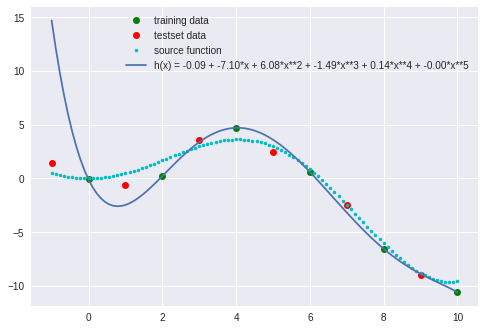

In [93]:
X = np.column_stack( (np.ones((x.size,1)) , x, x**2, x**3, x**4, x**5 )) # construct the augmented matrix X
Xtest = np.column_stack( (np.ones((x.size,1)) , xtest, xtest**2, xtest**3, xtest**4, xtest**5 )) # needed for error analysis
a = a_opt(X,y)   # solve the regression 

fig, ax = plt.subplots()
ax.plot( x,y, "o", color='g', label='training data')  # plot the test data
ax.plot(xtest,ytest, 'o', color='r', label='testset data')

xt = np.linspace(-1,10,100)
ax.plot(xt, f(xt), '.', color='c', label='source function')
ax.plot(xt, a[0] + a[1]*xt + a[2]*xt**2 + a[3]*xt**3 + a[4]*xt**4 + a[5]*xt**5,  
        label='h(x) = %.2f + %.2f*x + %.2f*x**2 + %.2f*x**3 + %.2f*x**4 + %.2f*x**5' 
        %(a[0],a[1],a[2],a[3],a[4],a[5]))  # plot the model function
ax.legend()

In [94]:
print('a =', a)  # print the values of a
print('training-set: ','J =', J(a,X,y), "   R2 =", R2(a,X,y))

print('test-set:     ','J =', J(a,Xtest,ytest), "       R2 =", R2(a,Xtest,ytest))

a = [ -9.19499198e-02  -7.09935750e+00   6.08114853e+00  -1.48923991e+00
   1.40489323e-01  -4.63274162e-03]
training-set:  J = 3.85913318695e-22    R2 = 1.0
test-set:      J = 15.2463480026        R2 = -0.739475193872


The model is a perfect fit to the training data but evaluating it against the test-set shows how bad it really is. $R^2$ for the model is 1 because of the perfect fit to the training data but for the test data $R^2$ is very far from +1. 

Now lets solve this same problem and include a regularization term.


In [29]:
def a_opt_reg(X,y,l_reg) : # linear regression with regularization a = (X'X + lL)^-1 X'y
    L = np.eye(X.shape[1])
    L[0,0] = 0
    XX = np.dot(X.T,X) + l_reg * L 
    a_opt_reg = np.dot( np.dot( np.linalg.pinv(XX),X.T), y)
    return a_opt_reg

def J_reg(a,X,y,l_reg) : # Regularized Cost function 
    m = y.size
    J_reg = 1/(2*m) * (np.dot( ( h(X,a) - y ).T, ( h(X,a) - y ) ) + l_reg * np.dot(a[1:],a[1:]) )
    return J_reg


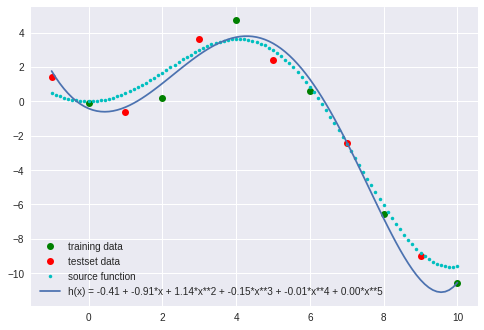

In [91]:
X = np.column_stack( (np.ones((x.size,1)) , x, x**2, x**3, x**4, x**5 )) # construct the augmented matrix X
Xtest = np.column_stack( (np.ones((x.size,1)) , xtest, xtest**2, xtest**3, xtest**4, xtest**5 )) # needed for error analysis

l_reg = .2
a = a_opt_reg(X,y,l_reg)   # solve the regression 

fig, ax = plt.subplots()
ax.plot( x,y, "o", color='g', label='training data')  # plot the test data
ax.plot(xtest,ytest, 'o', color='r', label='testset data')

xt = np.linspace(-1,10,100)
ax.plot(xt, f(xt), '.', color='c', label='source function')
ax.plot(xt, a[0] + a[1]*xt + a[2]*xt**2 + a[3]*xt**3 + a[4]*xt**4 + a[5]*xt**5,  
        label='h(x) = %.2f + %.2f*x + %.2f*x**2 + %.2f*x**3 + %.2f*x**4 + %.2f*x**5' 
        %(a[0],a[1],a[2],a[3],a[4],a[5]))  # plot the model function
ax.legend()

In [92]:
print('a =', a)  # print the values of a
print('training-set: ','J =', J_reg(a,X,y,l_reg), "   R2 =", R2(a,X,y))

print('test-set:     ','J =', J_reg(a,Xtest,ytest,l_reg), "       R2 =", R2(a,Xtest,ytest))

a = [-0.40825694 -0.90782337  1.13557476 -0.14540273 -0.00910186  0.00121802]
training-set:  J = 0.226096943079    R2 = 0.98524756091
test-set:      J = 0.351805355551        R2 = 0.963921637178


Much better! The regularization has smoothed the model and it now gives a good fit and generalizes well to the test-set.

In the next post I'll get back to Logistic Regression with an implementation, examples and a discussion of evaluating goodness of fit.

**Happy computing! --dbk**
